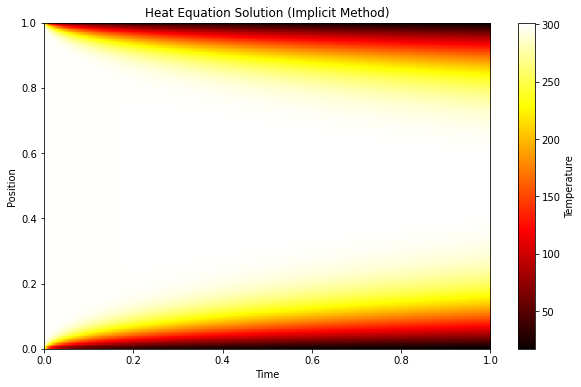

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Parameters
L = 1.0        # Length of the rod
T = 1.0        # Total simulation time
d = 0.01       # Thermal diffusivity
N = 100        # Number of spatial grid points
M = 10000        # Number of time steps

# Spatial grid
x = np.linspace(0, L, N+1)
dx = x[1] - x[0]

# Time grid
dt = T / M
t = np.linspace(0, T, M+1)

# Initial condition
def initial_condition(x):
    return 300 #np.sin(np.pi * x)

# Source term
def source_term(x, t):
    return np.exp( -(x-L/2)**2 / L/2) + 1/(t+1) # 0.0  

# Set up the tridiagonal matrix for the implicit method
alpha = d * dt / dx**2
A = np.diag(1 + 2 * alpha * np.ones(N-1)) - alpha * np.diag(np.ones(N-2), k=1) - alpha * np.diag(np.ones(N-2), k=-1)

# Initialize temperature matrix
T_matrix = np.zeros((N-1, M+1))

# Apply initial condition
T_matrix[:, 0] = initial_condition(x[1:N])

# Time-stepping using Implicit Euler
for i in range(1, M+1):
    b = T_matrix[:, i-1] + dt * source_term(x[1:N], t[i])
    T_matrix[:, i] = solve(A, b)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(T_matrix, extent=[0, T, 0, L], aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Temperature')
plt.title('Heat Equation Solution (Implicit Method)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


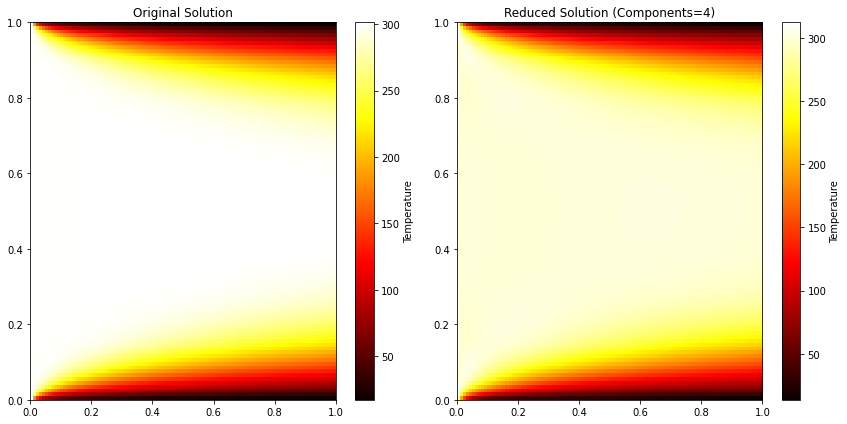

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from sklearn.utils.extmath import randomized_svd

# Parameters
L = 1.0        # Length of the rod
T = 1.0        # Total simulation time
d = 0.01       # Thermal diffusivity
N = 100        # Number of spatial grid points
M = 100        # Number of time steps
comp = 4       # Number of components to keep in SVD

# Spatial grid
x = np.linspace(0, L, N+1)
dx = x[1] - x[0]

# Time grid
dt = T / M
t = np.linspace(0, T, M+1)

# Initial condition
def initial_condition(x):
    return 300 #np.sin(np.pi * x)

# Source term
def source_term(x, t):
    return np.exp( -(x-L/2)**2 / L/2) + 1/(t+1) # 0.0

# Set up the tridiagonal matrix for the implicit method
alpha = d * dt / dx**2
A = np.diag(1 + 2 * alpha * np.ones(N-1)) - alpha * np.diag(np.ones(N-2), k=1) - alpha * np.diag(np.ones(N-2), k=-1)

# Initialize temperature matrix
T_matrix = np.zeros((N-1, M+1))

# Apply initial condition
T_matrix[:, 0] = initial_condition(x[1:N])

# Time-stepping using Implicit Euler
for i in range(1, M+1):
    b = T_matrix[:, i-1] + dt * source_term(x[1:N], t[i])
    T_matrix[:, i] = solve(A, b)

# Apply SVD to the solution matrix
U, s, Vh = randomized_svd(T_matrix, n_components=comp, random_state=0)

# Reconstruct the reduced solution matrix
T_matrix_reduced = U @ np.diag(s) @ Vh

# Plotting the original and reduced solutions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(T_matrix, extent=[0, T, 0, L], aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Temperature')
plt.title('Original Solution')

plt.subplot(1, 2, 2)
plt.imshow(T_matrix_reduced, extent=[0, T, 0, L], aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Temperature')
plt.title(f'Reduced Solution (Components={comp})')

plt.tight_layout()
plt.show()
